# Anomaly detection for time series data

###  Temperature Dataset: https://datahub.io/core/global-temp



---



In [1]:
!pip install adtk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.7 MB/s eta 0:00:00


Date
1880-01-06    0.0009
1880-02-06   -0.1229
1880-03-06   -0.1357
1880-04-06   -0.0499
1880-05-06   -0.0738
               ...  
2016-08-06    0.8998
2016-09-06    0.8767
2016-10-06    0.7292
2016-11-06    0.7504
2016-12-06    0.7895
Name: Mean, Length: 1644, dtype: float64


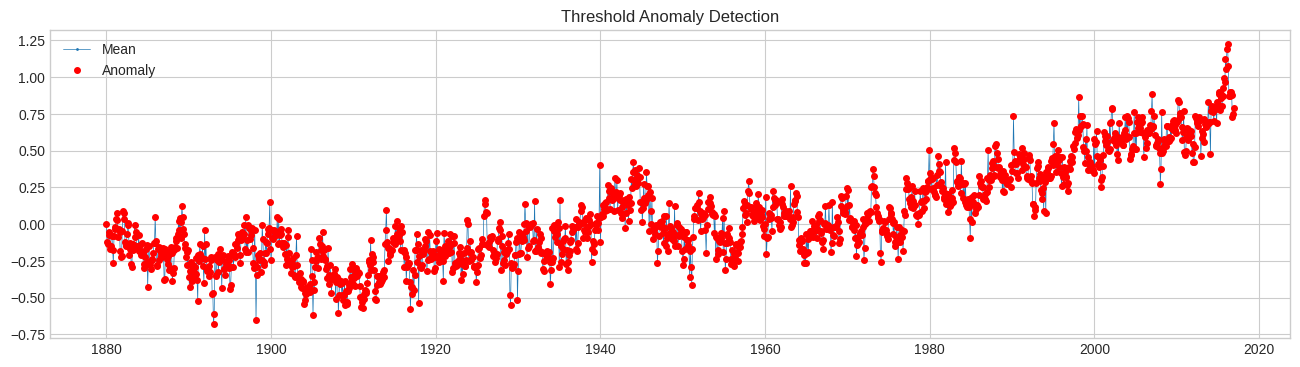

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import ThresholdAD, PersistAD, VolatilityShiftAD,QuantileAD, InterQuartileRangeAD, GeneralizedESDTestAD, VolatilityShiftAD, CustomizedDetectorHD

# to load only tabular data
data = pd.read_csv("/content/monthly_csv.csv", parse_dates=True)
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data = data['Mean']
data = validate_series(data)
print(data)

def plot_threshold(data):
   threshold_detector = ThresholdAD(low=0.75, high=-0.5)
   anomalies = threshold_detector.detect(data)
   plot(data, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')
   plt.title('Threshold Anomaly Detection')
   plt.show()


plot_threshold(data)


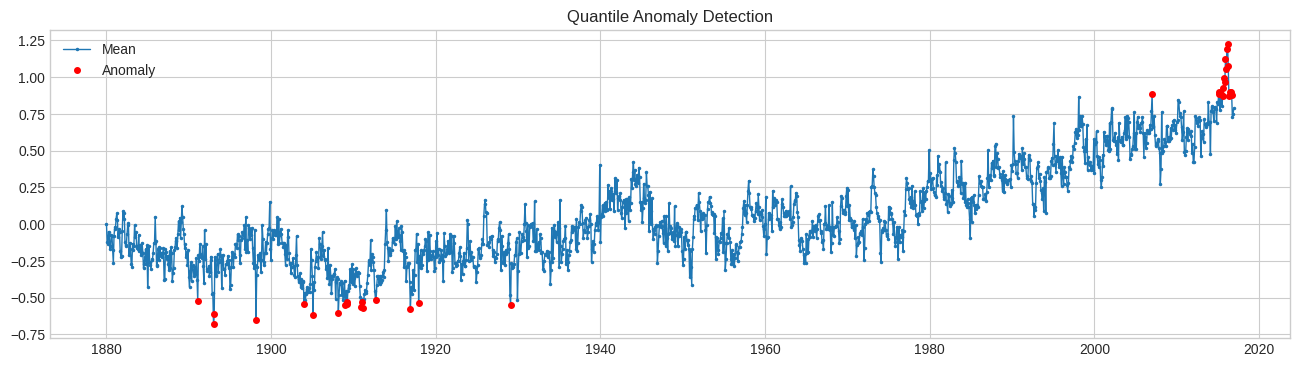

In [16]:
def plot_quantile(data):
  quantile_ad=QuantileAD(high=0.99, low=0.01)
  anomalies=quantile_ad.fit_detect(data)
  plot(data, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_tag='marker')
  plt.title('Quantile Anomaly Detection')
  plt.show()

plot_quantile(data)

/usr/local/lib/python3.10/dist-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


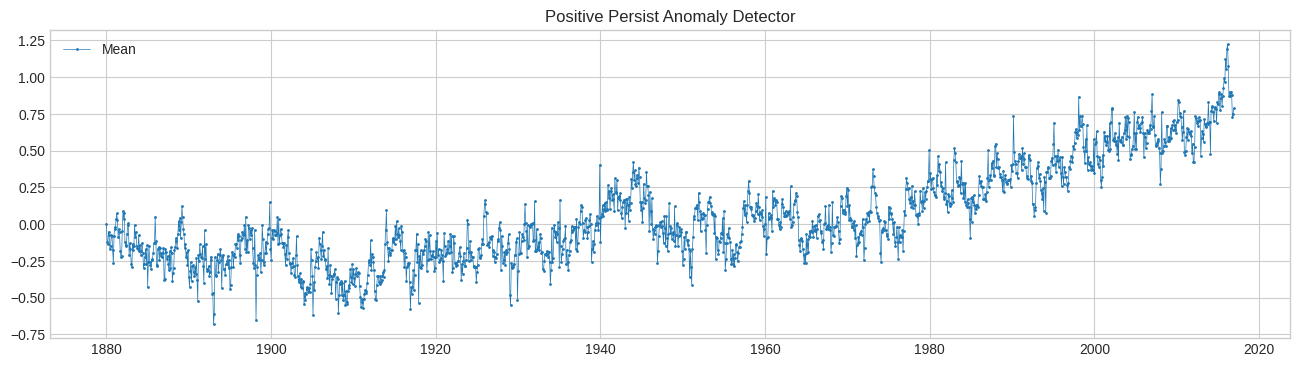

In [19]:
def plot_persist_pos(data):
    persist_detector = PersistAD(c=3.0, side='positive', window=30)
    anomalies = persist_detector.fit_detect(data)
    plot(data, anomaly=anomalies, anomaly_color='red')
    plt.title('Positive Persist Anomaly Detector')
    plt.show()

plot_persist_pos(data)

/usr/local/lib/python3.10/dist-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


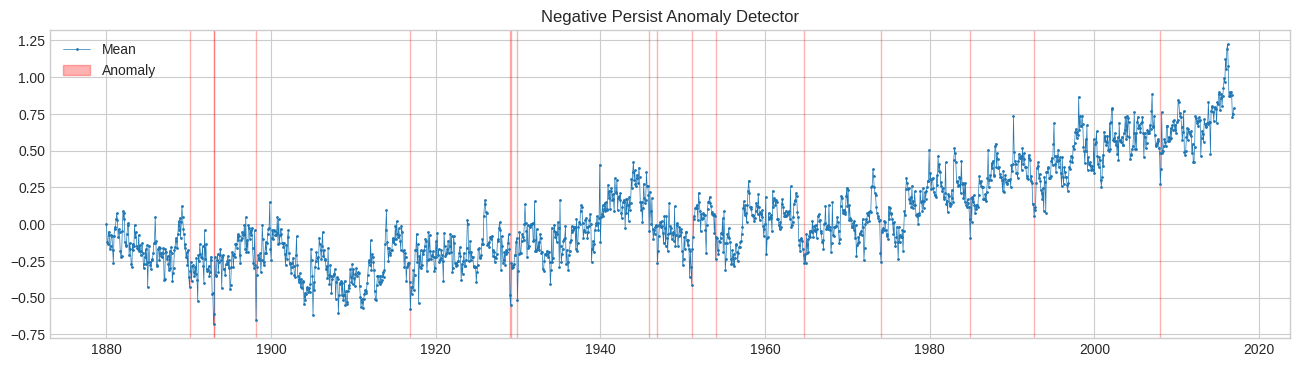

In [17]:
def plot_persist_neg(data):
    persist_detector = PersistAD(c=1.5, side='negative', window=24)
    # 24 (window)- by default just one day, we can adjust it for mid- to long-term detection
    anomalies = persist_detector.fit_detect(data)
    plot(data, anomaly=anomalies, anomaly_color='red')
    plt.title('Negative Persist Anomaly Detector')
    plt.show()

plot_persist_neg(data)

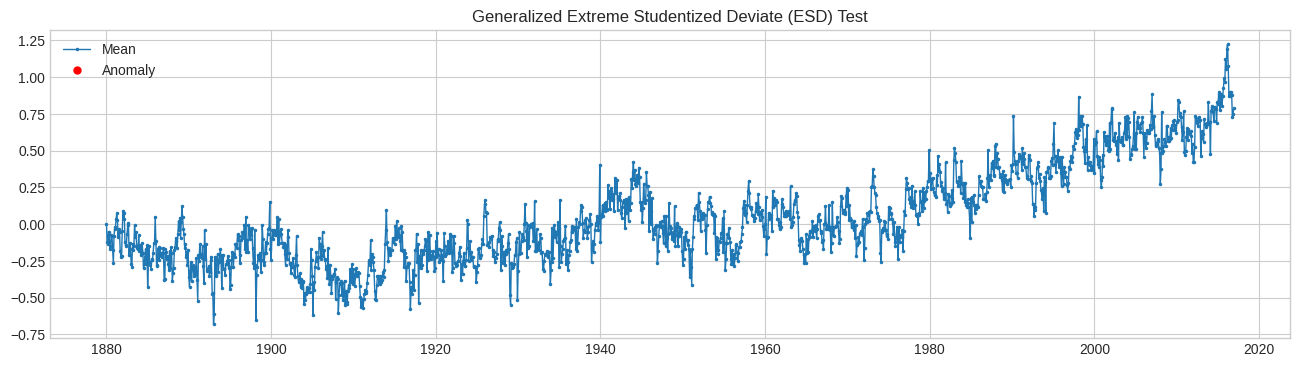

In [18]:
def generalizedESDTestAd(data):
  esd_ad = GeneralizedESDTestAD(alpha=0.3)
  anomalies = esd_ad.fit_detect(data)
  plot(data, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker")
  plt.title('Generalized Extreme Studentized Deviate (ESD) Test')
  plt.show()

generalizedESDTestAd(data)

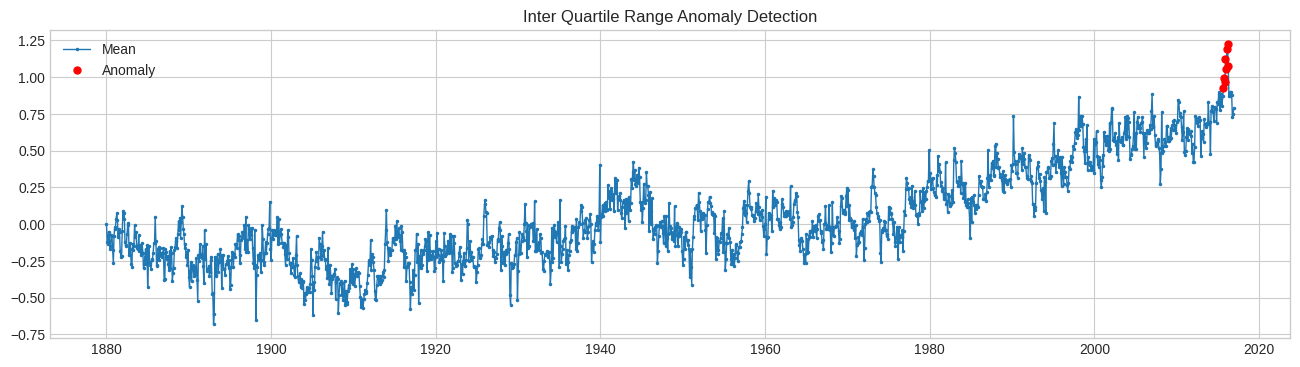

In [20]:
def interQuartileRangeAd(data):
  iqr_ad=InterQuartileRangeAD(c=1.5)
  anomalies = iqr_ad.fit_detect(data)
  plot(data, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker")
  plt.title('Inter Quartile Range Anomaly Detection')
  plt.show()

interQuartileRangeAd(data)

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


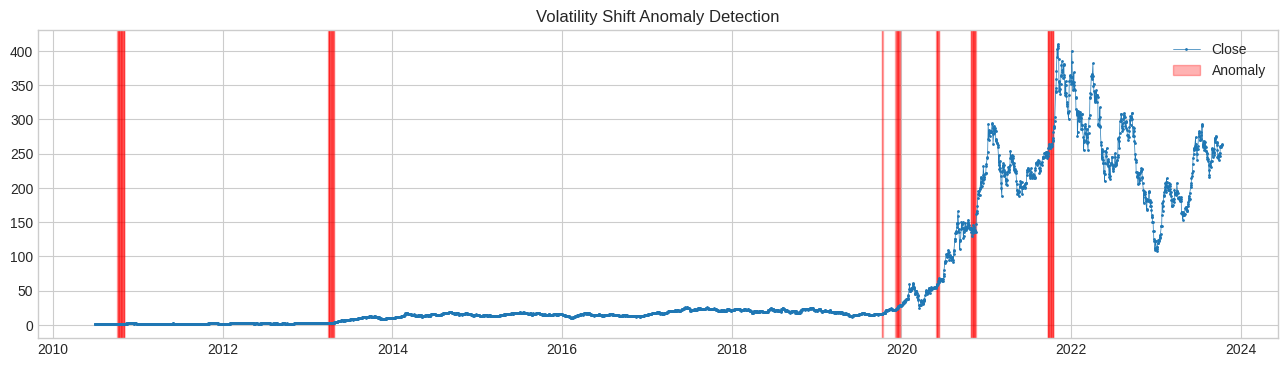

In [22]:
# Volatility Shift Anomaly Detection
data = yf.download("TSLA")['Close']
data = validate_series(data)

def volatility_shift_ad(data):
   volatility_shift_ad = VolatilityShiftAD(c=6.0, side='positive', window=30)
   anomalies = volatility_shift_ad.fit_detect(data)
   plot(data, anomaly=anomalies, anomaly_color='red')
   plt.title('Volatility Shift Anomaly Detection')
   plt.show()
volatility_shift_ad(data)